<a href="https://colab.research.google.com/github/s-im-ran/Deep-Learning/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:

from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In the above code the necessary libraries were imported

In [ ]:
cancerdat = datasets.load_breast_cancer()
#sklearn has a predefined dataset for breast cancer

Using the inbuilt scikit-learn breast cancer dataset

In [ ]:
X = pd.DataFrame(data = cancerdat.data, columns=cancerdat.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.shape

(569, 30)

In [ ]:
y=cancerdat.target

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [ ]:
X_train.shape

(512, 30)

In [ ]:
X_test.shape

(57, 30)

In [ ]:
y_test.shape

(57,)

In [ ]:
scaler=StandardScaler()


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 batch_normalization (BatchN  (None, 29, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 32)            0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))


Epoch 1/35
16/16 [==============================] - 14s 51ms/step - loss: 0.7489 - accuracy: 0.5957 - val_loss: 0.6359 - val_accuracy: 0.8421
Epoch 2/35
16/16 [==============================] - 0s 11ms/step - loss: 0.5154 - accuracy: 0.7402 - val_loss: 0.5833 - val_accuracy: 0.9123
Epoch 3/35
16/16 [==============================] - 0s 10ms/step - loss: 0.3709 - accuracy: 0.8516 - val_loss: 0.5354 - val_accuracy: 0.9474
Epoch 4/35
16/16 [==============================] - 0s 9ms/step - loss: 0.3219 - accuracy: 0.8750 - val_loss: 0.4889 - val_accuracy: 0.9474
Epoch 5/35
16/16 [==============================] - 0s 9ms/step - loss: 0.2806 - accuracy: 0.8906 - val_loss: 0.4444 - val_accuracy: 0.9474
Epoch 6/35
16/16 [==============================] - 0s 9ms/step - loss: 0.2661 - accuracy: 0.8887 - val_loss: 0.4020 - val_accuracy: 0.9298
Epoch 7/35
16/16 [==============================] - 0s 9ms/step - loss: 0.2333 - accuracy: 0.9043 - val_loss: 0.3605 - val_accuracy: 0.8947
Epoch 8/35
16/16

In [ ]:

def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()


  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

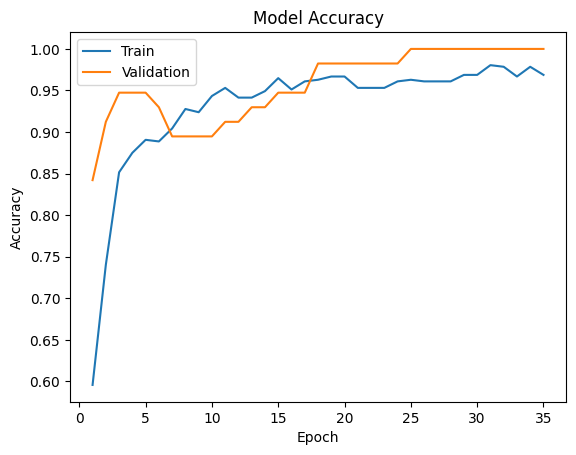

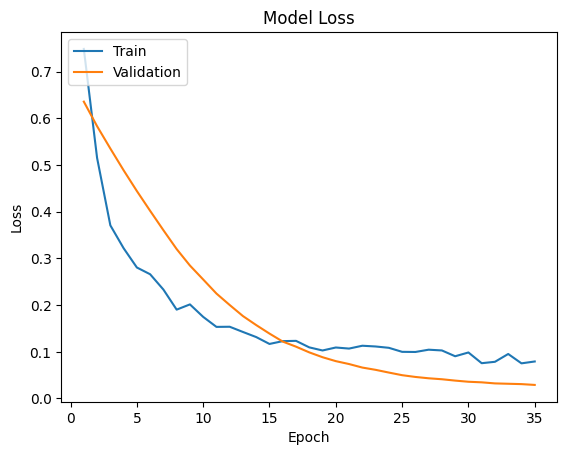

In [ ]:
plotLearningCurve(history,35)